In [1]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_img_train, y_label_train),(x_img_test, y_label_test) = cifar10.load_data()

In [3]:
print(len(x_img_train))
print(len(x_img_test))

50000
10000


In [4]:

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [5]:
print(x_img_train.shape)

(50000, 32, 32, 3)


In [6]:
x_img_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
label_dict = {0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship",9:"truck"}

In [8]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[idx], cmap='binary')
        title = str(i) + '.' + label_dict[labels[i][0]]
        if len(prediction) > 0:
            title += ',prediction=' + label_dict[prediction[i]]
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

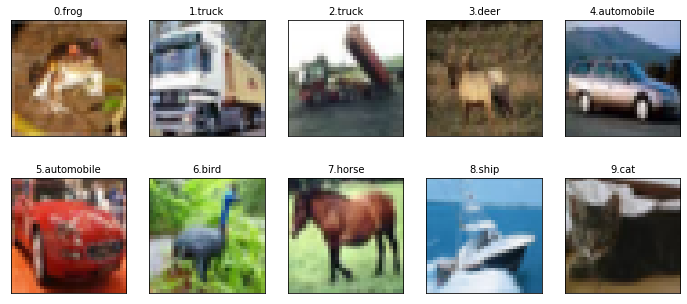

In [9]:
plot_images_labels_prediction(x_img_train, y_label_train, [], 0)

In [10]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') /255.0

In [11]:
x_img_train_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

In [12]:
y_label_train_normalize = np_utils.to_categorical(y_label_train)
y_label_test_normalize = np_utils.to_categorical(y_label_test)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [14]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3),
                activation='relu',
                padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [15]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
train_history = model.fit(x_img_train_normalize, y_label_train_normalize, validation_split=0.2,
                         epochs=10,
                         batch_size=128,
                         verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 10s 253us/step - loss: 1.5254 - acc: 0.4508 - val_loss: 1.4192 - val_acc: 0.5541
Epoch 2/10
40000/40000 [==============================] - 9s 214us/step - loss: 1.1622 - acc: 0.5844 - val_loss: 1.2184 - val_acc: 0.6218
Epoch 3/10
40000/40000 [==============================] - 9s 214us/step - loss: 1.0197 - acc: 0.6393 - val_loss: 1.1031 - val_acc: 0.6539
Epoch 4/10
40000/40000 [==============================] - 9s 214us/step - loss: 0.9166 - acc: 0.6764 - val_loss: 1.0592 - val_acc: 0.6715
Epoch 5/10
40000/40000 [==============================] - 9s 214us/step - loss: 0.8229 - acc: 0.7079 - val_loss: 1.0019 - val_acc: 0.6700
Epoch 6/10
40000/40000 [==============================] - 9s 214us/step - loss: 0.7500 - acc: 0.7389 - val_loss: 0.9213 - val_acc: 0.7053
Epoch 7/10
40000/40000 [==============================] - 9s 214us/step - loss: 0.6749 - acc: 0.7606 - val_loss: 0.8969 -

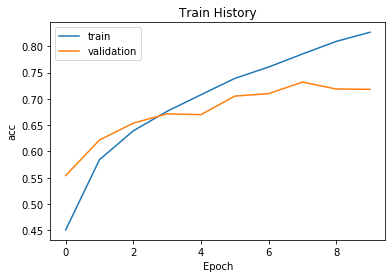

In [18]:
show_train_history(train_history, 'acc', 'val_acc')

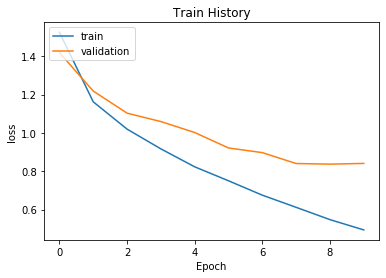

In [19]:
show_train_history(train_history, 'loss', 'val_loss')

In [29]:
scores = model.evaluate(x_img_test_normalize, y_label_test_normalize, verbose=1)
print(scores)

10000/10000 [==============================] - 2s 153us/step
[0.8495523290634155, 0.7216]


In [30]:
prediction = model.predict_classes(x_img_test_normalize)

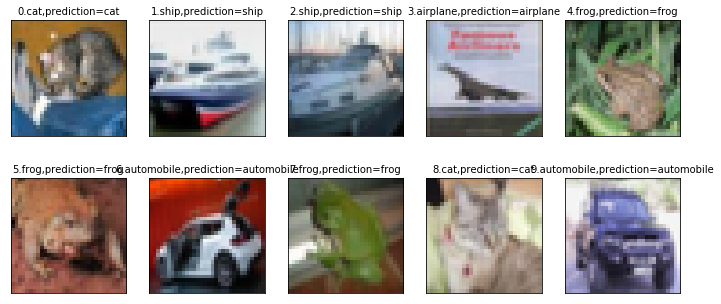

In [31]:
plot_images_labels_prediction(x_img_test, y_label_test, prediction, 0, 10)

In [32]:
predict_probability = model.predict(x_img_test_normalize)

In [38]:
def show_predicted_probability(y_label,prediction, x_img, probability, i):
    print('label: {}'.format(label_dict[y_label[i][0]]))
    print('predict: {}'.format(label_dict[prediction[i]]))
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j] + ' probaility: %1.9f'%(probability[i][j]))

label: cat
predict: cat


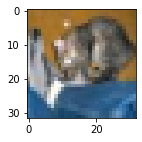

airplane probaility: 0.008572958
automobile probaility: 0.015320351
bird probaility: 0.006245001
cat probaility: 0.697987676
deer probaility: 0.007735744
dog probaility: 0.207247064
frog probaility: 0.011583581
horse probaility: 0.009440225
ship probaility: 0.032548934
truck probaility: 0.003318445


In [39]:
show_predicted_probability(y_label_test, prediction, x_img_test, predict_probability, 0)

In [40]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [41]:
import pandas as pd
pd.crosstab(y_label_test.reshape(-1), prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,727,25,55,22,19,2,18,4,101,27
1,11,865,5,14,6,3,11,2,37,46
2,50,6,574,84,112,42,85,25,16,6
3,15,8,49,580,72,132,92,22,20,10
4,14,2,55,66,735,22,57,38,10,1
5,12,1,46,228,54,565,42,33,15,4
6,2,8,27,51,35,11,859,1,5,1
7,9,4,36,59,76,49,20,724,10,13
8,31,36,17,13,10,6,11,2,864,10
